# 1. 머신러닝을 위한 선형 대수학

---

## 학습 목표
- 행렬과 벡터를 다루는 선형 대수학의 개념을 학습합니다.
- 학습한 수학 공식들을 코드로 계산하는 방법을 학습합니다.

---

## 목차

### 1. 벡터
1. 스칼라와 벡터 
2. 벡터 연산법

### 2. 행렬
1. 행렬의 정의
2. 행렬 연산자
3. 특수 행렬

---

## 0. 선형 대수학

머신러닝에서 대량의 데이터를 다룰 때 선형대수학이 없으면 어떨까요?

여러분은 주어진 데이터를 한 줄씩 읽어와 계산을 해야 하며, 각 데이터 간의 상관관계도 하나씩 비교를 하며 구해야할 것입니다.

선형대수학은 행렬과 벡터를 사용하여 수많은 데이터를 한 번에 묶어 계산을 매우 쉽게 도와주며, 묶여진 데이터의 고유의 특징들을 알려주어 겉으로 보기 힘든 다양한 특성들을 분석할 수 있게 합니다.

## 1. 벡터

### 1-1. 스칼라와 벡터

선형대수학을 대표하는 행렬을 다루기 전에 먼저 행렬을 이루고 있는 스칼라와 벡터의 개념을 이해하여 봅시다.

- **스칼라(scalar)**: 크기만 있고 방향을 가지지 않는 양
- **벡터(vector)**: 크기와 방향을 갖는 표현 도구

쉽게 말하면 스칼라는 크기만 가지고 있고 벡터는 거기에 방향 정보가 더해졌다고 생각할 수 있습니다.

벡터의 방향은 공간상에서 원점으로부터 벡터의 좌표로 향합니다.

##### <예제 1> 벡터 출력

x축과 y축 2차원 공간에서 A(붉은선),B(파란선),C(초록선) 벡터를 생성하여 직접 시각화해 봅시다.

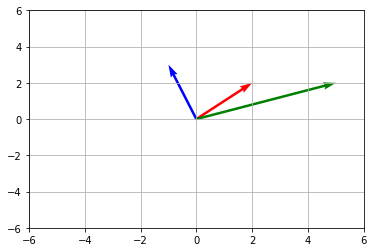

In [2]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

# A,B,C 벡터 정의
A = np.array([2,2])
B = np.array([-1,3])
C = np.array([5,2])
origin = [0], [0] # 원점

# 출력 파트
# A, B, C : R, B, G
plt.quiver(*origin, [A[0],B[0],C[0]], [A[1],B[1],C[1]], color=['r','b','g'], angles='xy', scale_units='xy',scale=1)
plt.axis([-6,6,-6,6])
plt.grid(True)
plt.show()

위 시각화 된 벡터들처럼 벡터의 방향은 공간상에서 원점으로부터 벡터의 좌표로 향합니다.

#### 벡터의 크기

벡터의 좌표로 정의된 벡터의 크기는 어떻게 알 수 있을까요?

위 실습에서 볼 수 있듯이 벡터는 원점에서 벡터의 성분이 가르키고 있는 좌표를 가르키는 화살표로 표시됩니다.

만약 화살표가 가르키는 좌표에서 x축으로 수선을 그으면 아래 그림과 같이 직각 삼각형을 만들 수 있습니다.

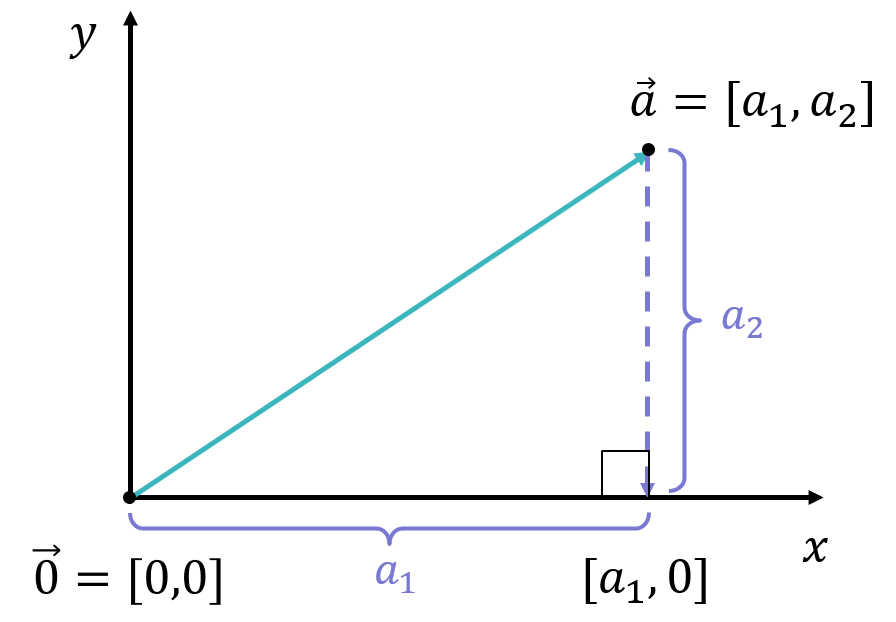<img src="img/1-1-1.png" width="40%" height="40%" title="local1" alt="local1"></img>

위 그림에서 벡터 $\vec{a}$는 크기가 $a_1$인 밑변과 크기가 $a_2$인 높이를 갖는 직각 삼각형을 보여주고 있습니다.

그렇다면 벡터 $\vec{a}$의 크기는 직각 삼각형의 빗변의 길이를 의미하기에 피타고라스의 정리를 사용하여 구할 수 있습니다.

#####  2차원 벡터의 크기

> $$|\vec{a}|=\sqrt{a_{1}^{2}+a_{2}^{2}}$$

$|\vec{a}|$는 벡터 $\vec{a}$의 크기를 의미합니다.

2차원 이상의 벡터는 위 식을 일반화 하여 다음과 같이 구할 수 있습니다.

아래 식에 대한 증명은 내적과 정사영을 이해하면 수행할 수 있습니다.

#####  벡터의 크기

> $$|\vec{a}|=\sqrt{\sum_{i=1}^{n} a_{i}^{2}}, \;\;\;\; \vec{a}=[a_1,a_2,....,a_n]$$

벡터의 크기는 벡터의 **l2 norm** 이라고 부르기도 하며 numpy에서는 `numpy.linalg.norm` 함수를 제공하여 벡터의 크기를 쉽게 구할 수 있습니다.

##### <예제 2> 벡터의 크기

In [4]:
from numpy import linalg as LA

# A,B,C 벡터 정의
A = np.array([3,4])
B = np.array([-1,3])
C = np.array([1,2,3,4])

# norm : numpy array로 만들어줌
A_norm = LA.norm(A)
B_norm = LA.norm(B)
C_norm = LA.norm(C)

print("A의 크기: {}".format(A_norm))
print("B의 크기: {}".format(B_norm))
print("C의 크기: {}".format(C_norm))

A의 크기: 5.0
B의 크기: 3.1622776601683795
C의 크기: 5.477225575051661


### 1-2. 벡터 연산법

벡터 연산은 대표적으로 덧셈, 뺄셈, 스칼라와의 곱셈, 내적이 존재합니다.

벡터 간의 덧셈과 뺄셈은 같은 인덱스에 있는 성분끼리 더하고 빼는것으로 구할 수 있습니다.

만약 두 벡터 $[a_{1},a_{2}]$ 와 $[b_{1},b_{2}]$ 를 더한다면 아래와 같이 연산됩니다.

##### 벡터 덧셈

> $$[a_{1},a_{2}]+[b_{1},b_{2}]=[a_{1}+b_{1},a_{2}+b_{2}]$$

만약 두 벡터 $[a_{1},a_{2}]$ 와 $[b_{1},b_{2}]$ 를 뺀다면 아래와 같이 연산됩니다.

##### 벡터 뺄셈

> $$[a_{1},a_{2}]-[b_{1},b_{2}]=[a_{1}-b_{1},a_{2}-b_{2}]$$

벡터의 덧셈과 뺄셈을 코딩을 통하여 구현해 봅시다.

##### <예제 3>벡터의 덧셈 구현

A + B = C -> [2 2] + [-1  3] = [1 5]


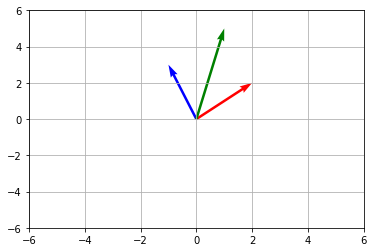

In [3]:
A = np.array([2,2])
B = np.array([-1,3])
C = A + B

print("A + B = C -> {} + {} = {}".format(A,B,C))

plt.quiver(*origin, [A[0],B[0],C[0]], [A[1],B[1],C[1]], color=['r','b','g'], angles='xy', scale_units='xy',scale=1)
plt.axis([-6,6,-6,6])
plt.grid(True)
plt.show()

#####  <예제 4>벡터의 뺄셈 구현

A - B = C -> [2 2] + [-1  3] = [ 3 -1]


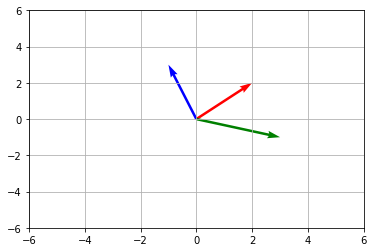

In [4]:
A = np.array([2,2])
B = np.array([-1,3])
C = A - B

print("A - B = C -> {} + {} = {}".format(A,B,C))

plt.quiver(*origin, [A[0],B[0],C[0]], [A[1],B[1],C[1]], color=['r','b','g'], angles='xy', scale_units='xy',scale=1)
plt.axis([-6,6,-6,6])
plt.grid(True)
plt.show()

#### 벡터와 스칼라의 곱셈

벡터와 스칼라의 곱셈은 벡터의 모든 성분에 스칼라 값을 곱하여 구할 수 있습니다.

스칼라  𝑐 와 벡터  [𝑎1,𝑎2]  를 곱하였을 때 아래와 같이 연산됩니다. 

##### 벡터와 스칼라의 곱셈

> $$c[a_{1},a_{2}]=[ca_{1},ca_{2}]$$

벡터와 스칼라와의 곱셈을 코딩을 통하여 구현해 봅시다.

##### <예제 5> 벡터와 스칼라의 곱셈

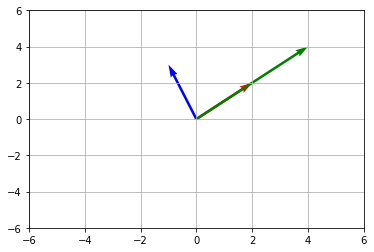

In [5]:
C = 2 * A

plt.quiver(*origin, [A[0],B[0],C[0]], [A[1],B[1],C[1]], color=['r','b','g'], angles='xy', scale_units='xy',scale=1)
plt.axis([-6,6,-6,6])
plt.grid(True)
plt.show()

붉은선(A)과 초록선(C)이 같은 방향에 있는 것을 알 수 있듯이, 벡터의 스칼라를 곱해주면 크기는 변화하지만 방향에는 변함이 없습니다.

#### 벡터의 내적

벡터 간에는 곱셈이 정의되지 않습니다. 대신 내적이란 유사한 계산법이 존재합니다.

**벡터 내적(inner product** or **dot product)**: 아래와 수식과 같이 벡터 $a$와 $b$의 내적은 각 벡터의 크기와 벡터 간의 사이각의 코사인 값을 곱한 형태로 정의됩니다.

##### 벡터의 내적

> $$\vec{a}\cdot \vec{b}= |\vec{a}||\vec{b}|\cos(\theta)$$

벡터 내적의 정의로는 위와 같이 정리되지만, 보다 자주 쓰이는 계산방법은 다음과 같습니다.

##### 벡터 내적 계산법

> $$\vec{a}\cdot \vec{b} = \sum_{i=1}^{n}a_{i}b_{i}, \;\; \;\; \vec{a}=[a_{1}, a_{2}, ..., a_{n}], \;\; \vec{b}=[b_{1}, b_{2}, ..., b_{n}]$$

벡터의 내적 계산은 정사영을 계산하기 위한 공식으로 자주 사용되기에 먼저 정사영에 대해서 간략히 알아봅시다.

**정사영**

정사영(Orthographic projection)은 일반적으로 아래 그림과 같이 도형의 각 점에서 한 평면에 내린 수선의 발이 그리는 도형을 의미합니다.

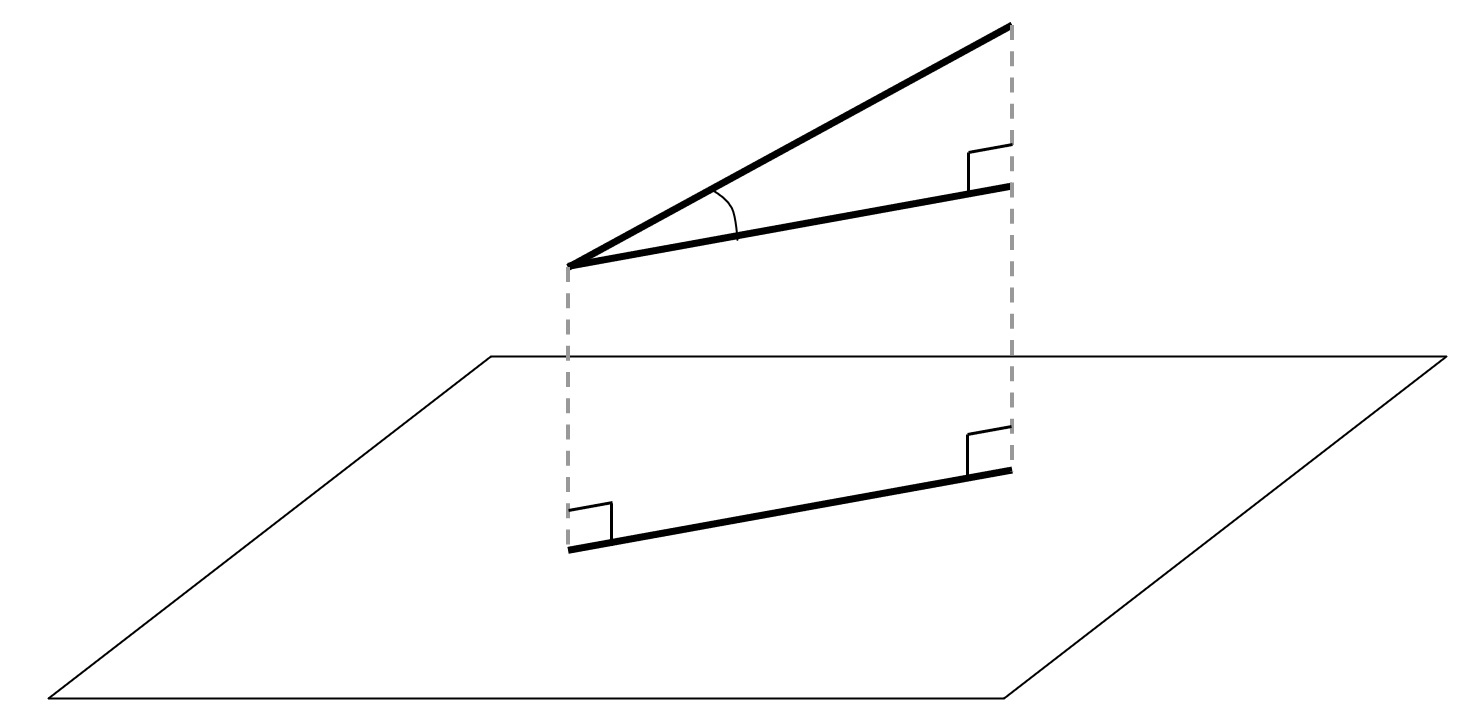

이와 비슷하게 공간 상의 영벡터가 아닌 두 벡터 $\vec{a}, \vec{b}$가 아래와 같이 있다고 가정한다면,

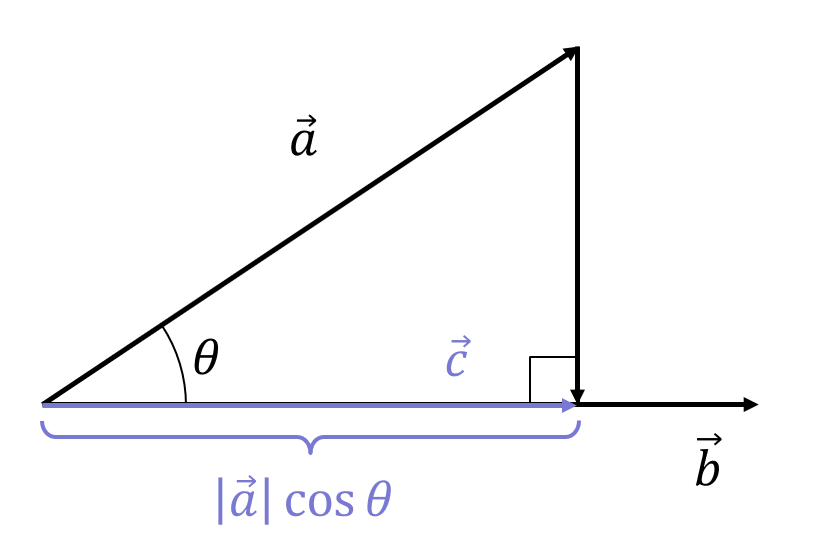

여기서 벡터 $\vec{a}$를 벡터 $\vec{b}$ 기준으로 수선의 발을 내린다면 위 그림과 같이 표현됩니다.

이 경우, $\vec{c}$ 벡터를 벡터 사영이라 부르고 그 크기는 벡터 $\vec{a}$와 벡터 $\vec{b}$의 내적인 $|\vec{a}|\cos(\theta)$으로 구할 수 있습니다.

결과적으로 벡터 사영 $\vec{c}$는 $\vec{b}$ 방향의 $|\vec{a}|\cos(\theta)$ 크기를 갖기에 다음과 같이 표현 가능합니다.

##### 정사영 벡터 정의

> $$\vec{c}=\frac{\vec{b}}{|\vec{b}|}|\vec{a}|\cos(\theta)$$

이 때, 벡터 $\vec{c}$를 구하기 위해서 벡터 $\vec{a}, \vec{b}$의 그 사이각 $\theta$를 계산하는 것은 쉽지 않습니다.

그렇기에 $\theta$를 구하지 않고 벡터의 내적을 활용하여 쉽게 $\vec{c}$를 구할 수 있습니다.

##### 내적을 사용한 정사영 표현

> $$\vec{c}=\frac{\vec{b}}{|\vec{b}||\vec{b}|}|\vec{a}||\vec{b}|\cos(\theta)=\frac{\vec{b}}{\vec{b}\cdot \vec{b}}\vec{a}\cdot \vec{b}=\frac{\vec{a}\cdot \vec{b}}{\vec{b}\cdot \vec{b}}\vec{b}$$

**머신러닝 기법에서의 내적**

벡터로 인코딩 된 데이터 간의 유사성을 계산하는 방식으로 대표적으로 사용됩니다.

한정적으로 사용되는 것처럼 보이나 벡터의 덧셈과 뺄셈처럼 데이터를 벡터 형태로 다루는 머신러닝 공식 상에서는 매우 빈번하게 사용됩니다.

##### <예제 6> 벡터 내적

1.0


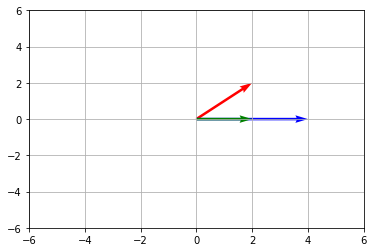

In [6]:
A = np.array([2,2])
X = np.array([4,0])
C = np.array([0,0])
origin = [0], [0] # origin point

# A to B #정사영
C = np.inner(A, X)/(sum(X**2))*X 
#C = np.inner(A, B)  # = sum(A[:]*B[:])
print(np.inner(A, X)/(sum(A**2)))

plt.quiver(*origin, [A[0],X[0],C[0]], [A[1],X[1],C[1]], color=['r','b','g'], angles='xy', scale_units='xy',scale=1)
plt.axis([-6,6,-6,6])
plt.grid(True)
plt.show()

---